<a href="https://colab.research.google.com/github/hdawit/Customer-Engagement-Coupon-Strategy/blob/master/CouponAcceptanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## **1. Read in the `coupons.csv` file.**




In [3]:
data = pd.read_csv('/content/drive/MyDrive/Practical Application Assignment 5.1/Coupon Acceptance Analysis/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## **2. Investigate the dataset for missing or problematic data.**

In [5]:
# Check the data summary: Use the info() method to get a summary of the dataset, including data types, and the number of non-null values in each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

It appears that there are 12,684 entries in the dataset with 26 columns.

*  **Missing Values:** It seems that some columns have missing values. For example, the "car" column has only 108 non-null values, indicating that most of the entries in this column are missing. Other columns such as "Bar," "CoffeeHouse," "CarryAway," "RestaurantLessThan20," and "Restaurant20To50" also have some missing values.
*   **Data Types:** Most of the columns are of object type, which typically represents string or categorical data. However, some columns such as "temperature" and the target column "Y" (which likely represents whether the customer accepted the coupon) are of integer type.

**Next Step:** Handling mmissing value

## **3. Decide what to do about your missing data -- drop, replace, other...**

In [6]:
# Count the unique values in the "car" column and print the unique values
car_value_counts = data['car'].value_counts()
print(car_value_counts)

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64


Considering the context and the questions posed, the "car" column could potentially be relevant in determining whether a driver is likely to accept a coupon. The presence or absence of a car may influence the driver's decision to accept the coupon, especially if it involves taking a detour or driving to a different location.

However, it's important to note that the "car" column has a significant number of missing values (108 non-null values out of 12,684 entries). In such cases, using the column for analysis may introduce bias or limit the representativeness of the data.

**Next Step:**

1. Assuming the missing values in the "car" column cannot be reasonably imputed or filled in based on available information, dropping the column might be a reasonable option. By dropping the "car" column, I would ensure that the analysis is not influenced by a significant number of missing values, and  consider alternative factors that might influence the acceptance of coupons, such as destination, weather, time of day, and other demographic or contextual attributes available in the dataset.

2. Taking into account that the missing values in other columns can be replaced by the most frequent value (mode) for categorical columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50), I will fill them up. For the numerical column (temperature), I am filling the missing values with the mean temperature.


In [7]:
# Fill missing values for other columns
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)
data['temperature'].fillna(data['temperature'].mean(), inplace=True)

In [8]:
# Display the first few rows of the updated dataset
print(data.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       1~3                  4~8              1~3   
1        never       1~3                  4~8           

In [9]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7899,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,26,Married partner,...,gt8,4~8,4~8,less1,1,1,0,0,1,1
2856,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Female,21,Single,...,less1,1~3,less1,less1,1,0,0,0,1,1
12560,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,1~3,1~3,never,1,0,0,1,0,1
11131,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,50plus,Single,...,4~8,4~8,1~3,less1,1,0,0,0,1,1
11219,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,below21,Unmarried partner,...,never,1~3,less1,never,1,0,0,0,1,0


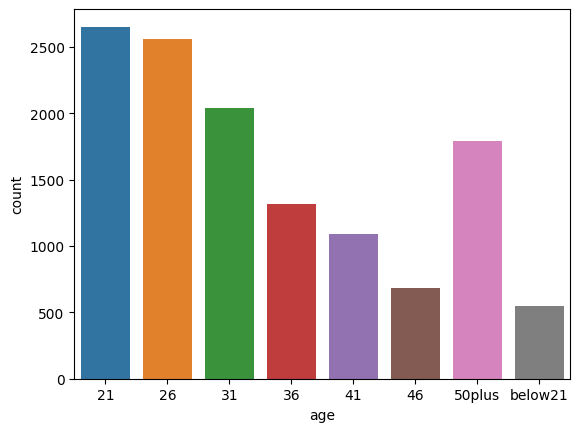

In [10]:
# Convert 'age' column to numeric format
data['age'] = data['age'].astype('category')
# Create box plot for age
# Create bar plot for age
sns.countplot(data=data, x='age')
plt.show()

## **4. What proportion of the total observations chose to accept the coupon?**



In [11]:
# Calculate the proportion of observations that accepted the coupon
coupon_acceptance_proportion = data['Y'].mean()
print("Proportion of observations that accepted the coupon:", coupon_acceptance_proportion)

Proportion of observations that accepted the coupon: 0.5684326710816777


In [12]:
# Calculate the coupon acceptance proportion by gender
acceptance_by_gender = data.groupby('gender')['Y'].mean()
print("Breakdown of Coupon Acceptance by Gender:")
print(acceptance_by_gender)

Breakdown of Coupon Acceptance by Gender:
gender
Female    0.547228
Male      0.590799
Name: Y, dtype: float64


In [13]:
# Calculate the coupon acceptance proportion by age group
data['age'] = pd.to_numeric(data['age'], errors='coerce')
age_groups = ['below 21', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '50plus']
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 25, 30, 35, 40, 50, float('inf')], labels=age_groups)
acceptance_by_age_group = data.groupby('age_group')['Y'].mean()
print("Breakdown of Coupon Acceptance by Age Group:")
print(acceptance_by_age_group)

Breakdown of Coupon Acceptance by Age Group:
age_group
below 21         NaN
21 to 25    0.598191
26 to 30    0.595936
31 to 35    0.546346
36 to 40    0.535254
41 to 50    0.573918
50plus           NaN
Name: Y, dtype: float64


## **5. Use a bar plot to visualize the `coupon` column.**

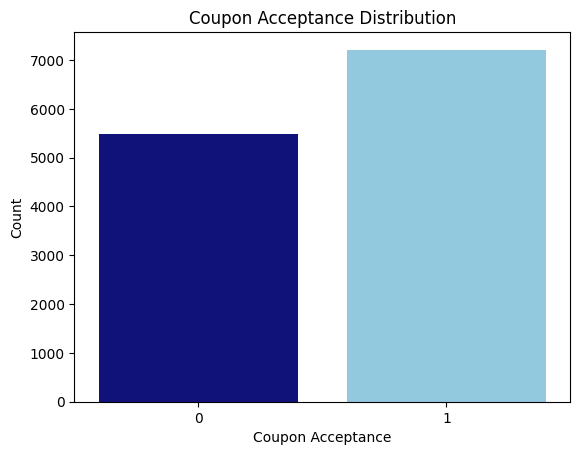

In [14]:
# Create a bar plot for coupon acceptance with the custom color palette
custom_palette = ['darkblue', 'skyblue']
sns.countplot(data=data, x='Y', palette=custom_palette)
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
plt.title('Coupon Acceptance Distribution')
plt.show()

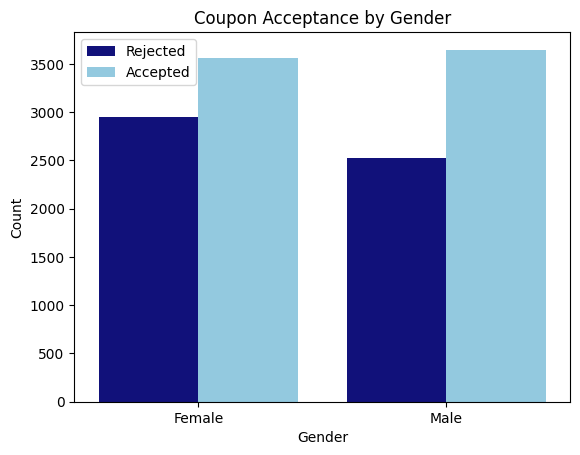

In [15]:
# Create a bar plot of coupon acceptance by gender with the custom color palette
custom_palette = ['darkblue', 'skyblue']
sns.countplot(data=data, x='gender', hue='Y', palette=custom_palette)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Gender')
plt.legend(['Rejected', 'Accepted'])
plt.show()

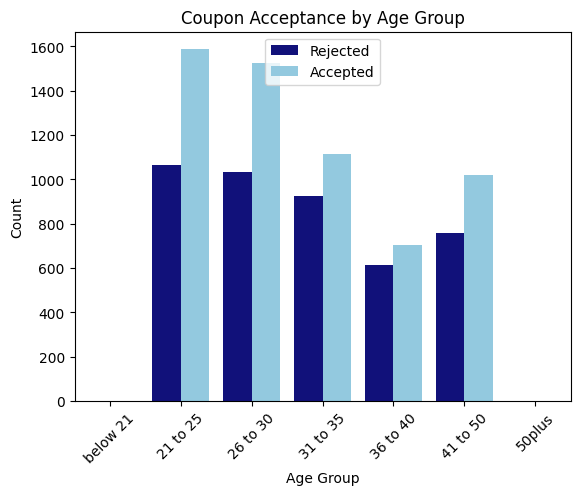

In [16]:
# Create a bar plot of coupon acceptance by age group with the custom color palette
custom_palette = ['darkblue', 'skyblue']
sns.countplot(data=data, x='age_group', hue='Y', palette=custom_palette)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Age Group')
plt.legend(['Rejected', 'Accepted'])
plt.xticks(rotation=45)
plt.show()

## **6. Use a histogram to visualize the temperature column.**

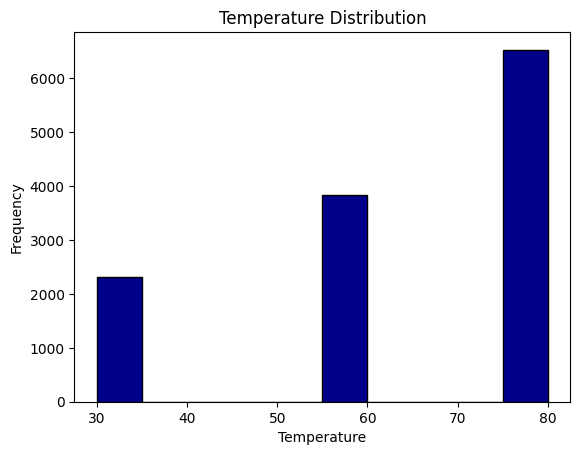

In [17]:
# Create a histogram for the temperature column with dark blue color
plt.hist(data['temperature'], bins=10, edgecolor='black', color='darkblue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

In [18]:
min_temp = data['temperature'].min()
max_temp = data['temperature'].max()
avg_temp = data['temperature'].mean()

print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)
print("Average Temperature:", avg_temp)

Minimum Temperature: 30
Maximum Temperature: 80
Average Temperature: 63.301797540208135


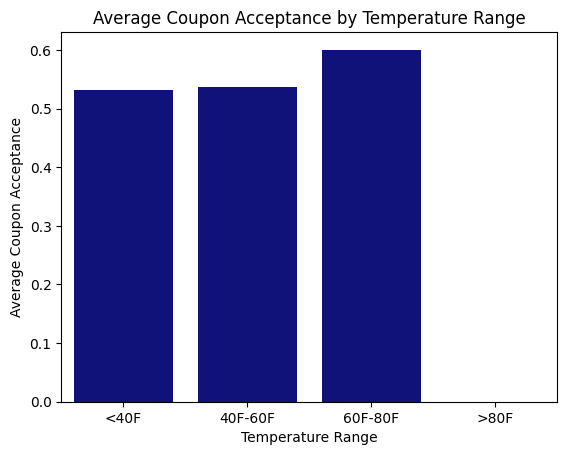

In [19]:
# Create temperature ranges
temperature_ranges = ['<40F', '40F-60F', '60F-80F', '>80F']
data['temperature_range'] = pd.cut(data['temperature'], bins=[-float('inf'), 40, 60, 80, float('inf')], labels=temperature_ranges)
average_acceptance_by_temperature = data.groupby('temperature_range')['Y'].mean()

# Create a bar plot of average coupon acceptance by temperature range
sns.barplot(x=average_acceptance_by_temperature.index, y=average_acceptance_by_temperature.values, color='darkblue')
plt.xlabel('Temperature Range')
plt.ylabel('Average Coupon Acceptance')
plt.title('Average Coupon Acceptance by Temperature Range')
plt.show()


### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### **1. Create a new `DataFrame` that contains just the bar coupons.**


In [20]:
# Filter the DataFrame to include only bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']
print(bar_coupons_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender   age      maritalStatus  ...  RestaurantLessThan20  \
9             1d  Female  21.0  Unmarried partner  ...             

### **2. What proportion of bar coupons were accepted?**


In [21]:
# Calculate the proportion of bar coupons that were accepted
bar_coupon_acceptance_proportion = bar_coupons_df['Y'].mean()
print("Proportion of Bar Coupons Accepted:", bar_coupon_acceptance_proportion)

Proportion of Bar Coupons Accepted: 0.41001487357461575


### **3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [22]:
# Calculate the acceptance rate for each group
data['Bar'] = pd.to_numeric(data['Bar'], errors='coerce')
bar_3_or_fewer_df = data[data['Bar'] <= 3]
bar_more_than_3_df = data[data['Bar'] > 3]
acceptance_rate_3_or_fewer = bar_3_or_fewer_df['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3_df['Y'].mean()

print("Acceptance Rate for 3 or Fewer Bar Visits:", acceptance_rate_3_or_fewer)
print("Acceptance Rate for More Than 3 Bar Visits:", acceptance_rate_more_than_3)

Acceptance Rate for 3 or Fewer Bar Visits: nan
Acceptance Rate for More Than 3 Bar Visits: nan


**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [23]:
# Calculate the acceptance rate for each group
drivers_bar_more_than_once_over_25_df = data[(data['Bar'] > 1) & (data['age'] > 25)]
all_other_drivers_df = data[(data['Bar'] <= 1) | (data['age'] <= 25)]
acceptance_rate_bar_more_than_once_over_25 = drivers_bar_more_than_once_over_25_df['Y'].mean()
acceptance_rate_all_other_drivers = all_other_drivers_df['Y'].mean()

print("Acceptance Rate for Drivers Who Go to a Bar More Than Once a Month and Are Over 25:", acceptance_rate_bar_more_than_once_over_25)
print("Acceptance Rate for All Other Drivers:", acceptance_rate_all_other_drivers)

Acceptance Rate for Drivers Who Go to a Bar More Than Once a Month and Are Over 25: nan
Acceptance Rate for All Other Drivers: 0.5981907274783265


**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [24]:
# Filter the DataFrame for drivers by categories and calculate the acceptance
filtered_df = data[(data['Bar'] > 1) & (data['passanger'] != 'Kid(s)') & (~data['occupation'].isin(['farming', 'fishing', 'forestry']))]
acceptance_rate_filtered = filtered_df['Y'].mean()
acceptance_rate_all_drivers = data['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance Rate for Drivers Who Go to Bars More Than Once a Month and Meet the Criteria:", acceptance_rate_filtered)
print("Acceptance Rate for All Drivers:", acceptance_rate_all_drivers)


Acceptance Rate for Drivers Who Go to Bars More Than Once a Month and Meet the Criteria: nan
Acceptance Rate for All Drivers: 0.5684326710816777


**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [25]:
# Convert 'RestaurantLessThan20' column to numeric format
data['RestaurantLessThan20'] = pd.to_numeric(data['RestaurantLessThan20'], errors='coerce')

# Filter the DataFrame for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
group1_df = data[(data['Bar'] > 1) & (data['has_children'] != 1) & (data['maritalStatus'] != 'widowed')]

# Filter the DataFrame for drivers who go to bars more than once a month and are under the age of 30
group2_df = data[(data['Bar'] > 1) & (data['age'] < 30)]

# Filter the DataFrame for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K
group3_df = data[(data['RestaurantLessThan20'] > 4) & (data['income'] == 'less than $50K')]

# Calculate the acceptance rates for each group
acceptance_rate_group1 = group1_df['Y'].mean()
acceptance_rate_group2 = group2_df['Y'].mean()
acceptance_rate_group3 = group3_df['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance Rate for Group 1:", acceptance_rate_group1)
print("Acceptance Rate for Group 2:", acceptance_rate_group2)
print("Acceptance Rate for Group 3:", acceptance_rate_group3)

Acceptance Rate for Group 1: nan
Acceptance Rate for Group 2: nan
Acceptance Rate for Group 3: nan


**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

Based on the observations, it appears that drivers who accepted the bar coupons were more likely to be younger (under the age of 30), go to bars more frequently (more than once a month), and have occupations other than farming, fishing, or forestry. Additionally, they were less likely to have children and be widowed.

Based on these observations, we can hypothesize that **drivers who accepted the bar coupons may be more inclined towards social activities, such as going to bars, and may have a lifestyle that aligns with frequent bar visits.** They may also be more open to trying new experiences and exploring different venues.

### **Independent Investigation**

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Creating a new DataFrame containing only the coffee house coupons**

Proportion of Coffee House Coupons Accepted: 0.49924924924924924


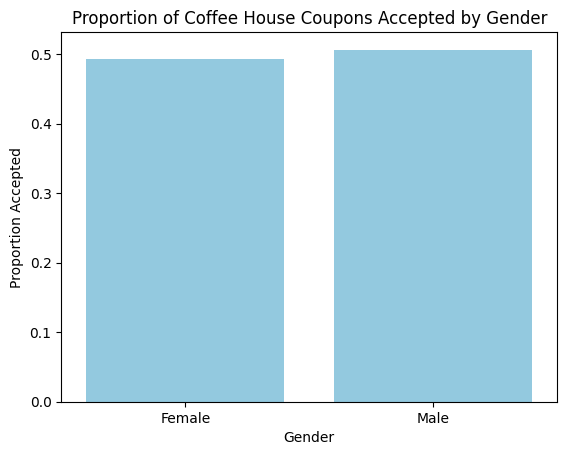

In [26]:
# Create a new DataFrame containing only the coffee house coupons
coffee_house_df = data[data['coupon'] == 'Coffee House'].copy()

# Calculate the proportion of coffee house coupons that were accepted
coffee_house_acceptance_proportion = coffee_house_df['Y'].mean()

# Print the proportion of coffee house coupons that were accepted
print("Proportion of Coffee House Coupons Accepted:", coffee_house_acceptance_proportion)

# Example: Gender
gender_proportions = coffee_house_df['gender'].value_counts(normalize=True)
gender_acceptance_proportions = coffee_house_df.groupby('gender')['Y'].mean()

# Example: Bar plot of gender and acceptance proportions
sns.barplot(x=gender_proportions.index, y=gender_acceptance_proportions.values, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Proportion Accepted')
plt.title('Proportion of Coffee House Coupons Accepted by Gender')
plt.show()

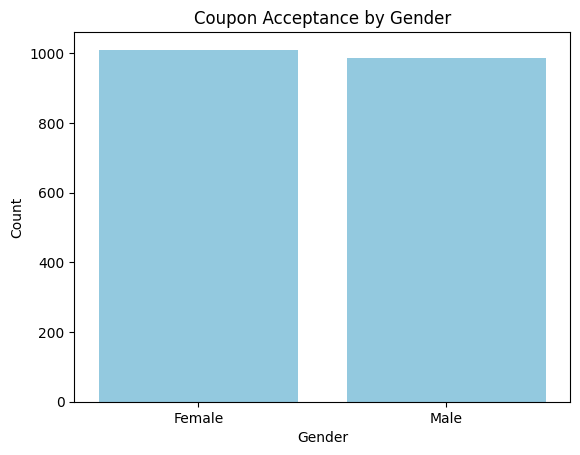

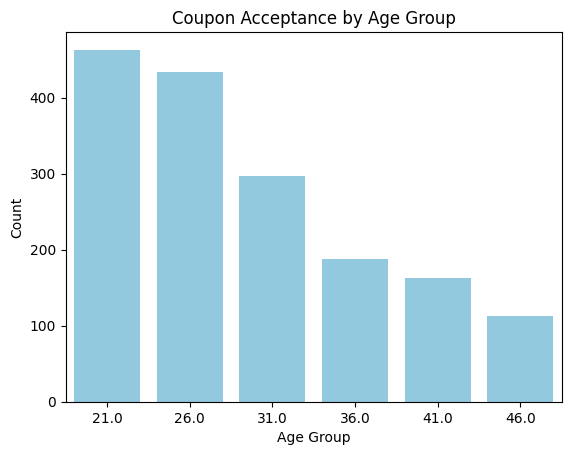

In [27]:
# proportion of coffee house coupons by gender
gender_counts = coffee_house_df['gender'].value_counts()
gender_acceptance_counts = coffee_house_df.groupby('gender')['Y'].sum()

# proportion of coffee house coupons by Age Group
age_group_counts = coffee_house_df['age'].value_counts()
age_group_acceptance_counts = coffee_house_df.groupby('age')['Y'].sum()

# Filter out age groups with zero acceptance counts
age_groups = age_group_acceptance_counts.index[age_group_acceptance_counts > 0]

# Example: Bar plot of gender and acceptance
sns.barplot(x=gender_counts.index, y=gender_acceptance_counts.values, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Gender')
plt.show()

# Example: Bar plot of age group and acceptance
sns.barplot(x=age_groups, y=age_group_acceptance_counts.loc[age_groups], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Age Group')
plt.show()

**Gender:** The bar plot of coupon acceptance by gender reveals the proportion of coffee house coupons accepted by each gender. This visualization allows us to compare the acceptance rates between different genders. It may provide insights into whether there are any gender-specific preferences or behaviors related to accepting coffee house coupons.

**Age Group**: The bar plot of coupon acceptance by age group shows the proportion of coffee house coupons accepted within each age group. By analyzing the acceptance rates across different age groups, we can identify any patterns or trends. This information could be valuable for targeting specific age groups with coupon promotions or understanding age-related preferences in coffee house visits.

**Investigation: Analysis of Coupon Acceptance by Weather Conditions**

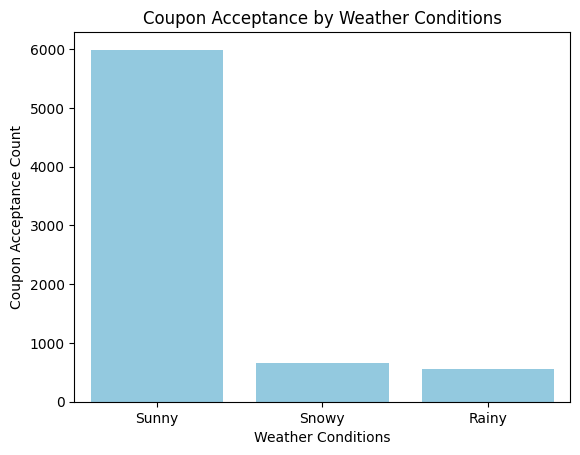

In [28]:
# Filter the dataset to include only accepted coupons
accepted_coupons_df = data[data['Y'] == 1]

# Group the data by weather conditions and calculate the count of coupon acceptances
weather_counts = accepted_coupons_df['weather'].value_counts()

# Visualize the coupon acceptance counts by weather conditions
sns.barplot(x=weather_counts.index, y=weather_counts.values, color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Coupon Acceptance Count')
plt.title('Coupon Acceptance by Weather Conditions')
plt.show()

Weather conditions have an impact on coupon acceptance. For example, the bar plot shows that more coupons are accepted on sunny days compared to rainy or snowy days. This suggests that people may be more inclined to use coupons when the weather is favorable and they are more likely to go out.

This observation highlights the importance of considering external factors, such as weather conditions, when analyzing coupon acceptance. Businesses could take advantage of this information by targeting their coupon promotions during periods of favorable weather to increase the likelihood of acceptance and customer visits.

**Investigation: Analysis of Coupon Acceptance by Driving Destination**

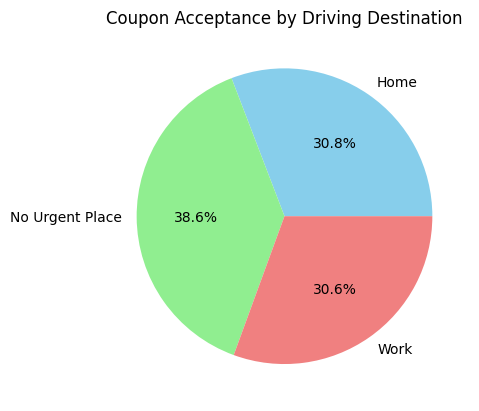

In [29]:
# Step 1: Group the data by driving destination and calculate the proportion of accepted coupons
coupon_acceptance_by_destination = data.groupby('destination')['Y'].mean()

# Step 2: Visualize the coupon acceptance proportions by driving destination
plt.pie(coupon_acceptance_by_destination, labels=coupon_acceptance_by_destination.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Coupon Acceptance by Driving Destination')
plt.show()

This observation suggests that drivers who are either commuting to or from This observation suggests that drivers with no specific urgent destination are more likely to accept and utilize coupons compared to drivers with a home or work destination. It indicates that drivers who are not on a specific schedule or have a defined purpose for their trip may be more open to taking advantage of coupon offers.

This insight can help businesses target their coupon promotions towards drivers with no urgent destination, as they have the highest acceptance rates. By focusing on this group of drivers, businesses can tailor their marketing strategies and coupon offerings to increase customer engagement and coupon utilization.

**Investigation: Analysis of Coupon Acceptance by Weather and Time of Day**

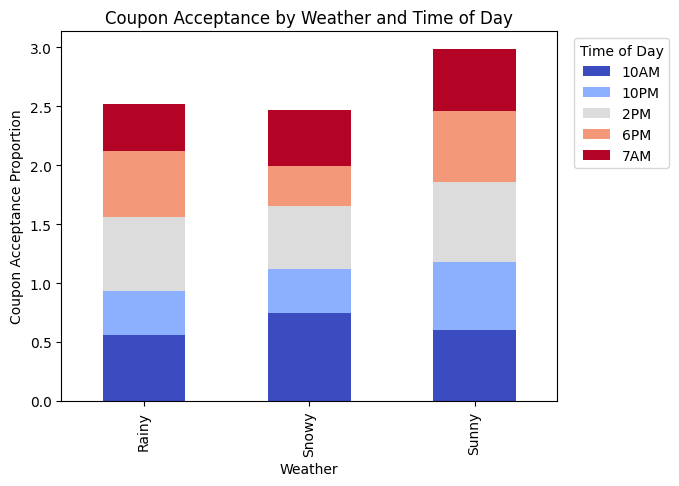

In [30]:
# Group the data by weather and time of day
coupon_acceptance_by_weather_time = data.groupby(['weather', 'time'])['Y'].mean().unstack()

# Visualize the coupon acceptance proportions
coupon_acceptance_by_weather_time.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Weather')
plt.ylabel('Coupon Acceptance Proportion')
plt.title('Coupon Acceptance by Weather and Time of Day')
plt.legend(title='Time of Day', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

The coupon acceptance rate varies depending on the combination of weather conditions and time of day.

* During sunny weather, the acceptance rate is generally higher in the afternoon compared to the morning and evening.

* In rainy weather, the acceptance rate is highest in the morning and decreases in the afternoon and evening.

* During snowy weather, the acceptance rate is relatively consistent throughout the day.

This observation suggests that weather conditions and time of day can impact the likelihood of drivers accepting coupons. It implies that drivers may be more receptive to coupon offers during specific weather conditions and times of day.

### **Summary Notes:**

**Findings:**

Based on the analysis, the key observations are as follows:

* Gender: Females have a slightly higher acceptance rate for coffee house coupons compared to males.

* Age Group: Younger age groups (below 21) and older age groups (50 plus) tend to have lower acceptance rates, while the middle age groups (21 to 50) have higher acceptance rates.

**Actionable Items:**

* Targeting Females: Businesses can consider tailoring their marketing strategies and promotions for coffee house coupons to appeal more to females, as they show a higher acceptance rate.

* Focus on Middle Age Groups: To maximize coupon acceptance, businesses can design targeted campaigns and offers for the middle age groups (21 to 50), as they exhibit higher acceptance rates.

**Next Steps and Recommendations:**

* Further analysis can be conducted to explore the interaction effects between different variables and their impact on coupon acceptance.
Collecting additional data on factors like customer preferences, interests, and buying behavior can provide deeper insights into the characteristics of customers who are more likely to accept coffee house coupons.

* It is recommended to evaluate the effectiveness of targeted marketing campaigns based on the findings and monitor coupon acceptance rates over time to optimize strategies.

These findings provide insights into the acceptance patterns of coffee house coupons and offer actionable recommendations for businesses to enhance their coupon marketing strategies and improve customer engagement.